In [1]:
import pandas as pd


In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df2=df1.drop(["society","availability","area_type","balcony"],axis=1)
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df3=df2.dropna()

In [6]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df3['bhk']=df3['size'].apply(lambda x:x.split(" ")[0])

C:\Users\Admin\AppData\Local\Temp/ipykernel_4420/3907227538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:x.split(" ")[0])


In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
def isfloat(x):
    try:
        float(x)
    except:
        return False;
    return True;

In [11]:
df3[~df3['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [12]:
def average(x):
    token=x.split("-")
    if(len(token)==2):
           return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(average)

In [14]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [15]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [17]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [18]:
len(df4.location.unique())

1304

In [19]:
df4.location=df4.location.apply(lambda x: x.strip() )
# strip used to remove leading spaces from string

In [20]:
loc_stats=df4['location'].value_counts(ascending=False)

In [21]:
loc_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [22]:
location_stats_less_than_10 = loc_stats[loc_stats<=10]

df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [23]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
len(df4.location.unique())

242

In [25]:
df5=df4.drop('size',axis=1)

df5.head()

In [26]:
df5.bhk=df5.bhk.apply(lambda x: float(x))

In [27]:
df6=df5[~((df5.total_sqft/df5.bhk)<300)]

In [28]:
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [29]:
df6.shape

(12502, 5)

In [30]:
df5.shape

(13246, 5)

In [31]:
df6['pricepersqft']=df6['price']*100000/df6['total_sqft']

C:\Users\Admin\AppData\Local\Temp/ipykernel_4420/210519530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['pricepersqft']=df6['price']*100000/df6['total_sqft']


In [32]:
df6.head()

,location,total_sqft,bath,price,bhk,pricepersqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [33]:
df6.pricepersqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: pricepersqft, dtype: float64

In [34]:
import numpy as np
df6.groupby('location')
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df6.groupby('location'):
        m = np.mean(subdf.pricepersqft)
        st = np.std(subdf.pricepersqft)
        reduced_df = subdf[(subdf.pricepersqft>(m-st)) & (subdf.pricepersqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

In [35]:
df7.head()












,location,total_sqft,bath,price,bhk,pricepersqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [36]:
df7.describe()

,total_sqft,bath,price,bhk,pricepersqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,90.982730,2.572210,5657.702572
std,876.716232,0.981338,86.147549,0.896219,2266.476980
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [37]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [38]:
sub_df_2=df7[(df7.location=='Rajaji Nagar') & (df7.bhk==2.00)]
sub_df_3=df7[(df7.location=='Rajaji Nagar') & (df7.bhk==3.00)]
from matplotlib import pyplot as plt
%matplotlib inline
sub_df_2

,location,total_sqft,bath,price,bhk,pricepersqft
5737,Rajaji Nagar,1370.0,2.0,170.0,2.0,12408.759124
5740,Rajaji Nagar,1718.0,3.0,288.0,2.0,16763.678696
5743,Rajaji Nagar,1200.0,2.0,150.0,2.0,12500.000000
5744,Rajaji Nagar,1160.0,1.0,163.0,2.0,14051.724138
5746,Rajaji Nagar,1440.0,2.0,170.0,2.0,11805.555556
5748,Rajaji Nagar,1440.0,2.0,185.0,2.0,12847.222222
5755,Rajaji Nagar,1357.0,2.0,130.0,2.0,9579.955785
5762,Rajaji Nagar,1763.0,3.0,262.0,2.0,14861.032331
5769,Rajaji Nagar,1268.0,2.0,127.0,2.0,10015.772871
5772,Rajaji Nagar,1200.0,1.0,200.0,2.0,16666.666667


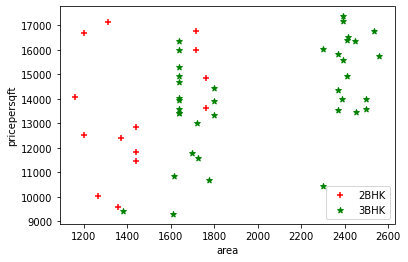

In [39]:
plt.scatter(sub_df_2.total_sqft,sub_df_2.pricepersqft,color="red",marker="+",label='2BHK')
plt.scatter(sub_df_3.total_sqft,sub_df_3.pricepersqft,color="green",marker="*",label='3BHK')
plt.xlabel("area")
plt.ylabel("pricepersqft")
plt.legend()

In [40]:
df7.shape[0]

10241

In [41]:
# def rem_outliers_bhk(df):
#     exc=np.array([])
#     for location ,lf in df.groupby('location'):
        
#         bhk_stats={}
#         for bhk , bhk_df in lf.groupby('bhk'):
#             bhk_stats[bhk] = {
#                 'mean': np.mean(bhk_df.pricepersqft),
#                 'std': np.std(bhk_df.pricepersqft),
#                 'count': bhk_df.shape[0]
#             }
#         for bhk , bhk_df in lf.groupby('bhk'):
            
#             stats = bhk_stats.get(bhk-1)
#             print(stats)
#             if stats and stats['count']>5:
#                 print("its working")
#                 exc=np.append(exc, bhk_df[bhk_df.pricepersqft<(stats['mean'])].index.values)
#         return df.drop(exc,axis='index')
                
        
        
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.pricepersqft),
                'std': np.std(bhk_df.pricepersqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.pricepersqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')        
    
    

In [42]:
df8= remove_bhk_outliers(df7)

In [43]:
df8.shape

(7329, 6)

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df9=df8[df8.bath<df8.bhk+2.00]

In [46]:
df9.shape

(7251, 6)

In [47]:
df9.head()

,location,total_sqft,bath,price,bhk,pricepersqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [48]:
df10=df9.drop('pricepersqft',axis=1)

In [49]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [50]:
dummies=pd.get_dummies(df10.location)

In [51]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)

In [52]:
df11.shape

(7251, 246)

In [53]:
df12=df11.drop(['location','price'],axis=1)

In [54]:
df12.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y=df11.price

In [56]:
len(y)

7251

In [76]:
# linear Regression ,Lasso, Decision Tree
#Grid Search CV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
score=[]

# Grid search cv for linear Regression

In [77]:
glin=GridSearchCV(LinearRegression(),{
    'normalize': [True, False]
},cv=cv,return_train_score=False)  
glin.fit(df12,y)
score.append({
'linscore':glin.best_score_,
'linparam':glin.best_params_
})

# Grid search cv for lasso Regression

In [78]:
glas=GridSearchCV(Lasso(),{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            
},cv=cv,return_train_score=False)  
glas.fit(df12,y)
score.append({
'lasscore':glas.best_score_,
'lasparam':glas.best_params_
})

# Grid search cv for Decision tree

In [79]:

gtree=GridSearchCV(DecisionTreeRegressor(),{
               'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            
},cv=cv,return_train_score=False)  
gtree.fit(df12,y)
score.append({
'treescore':gtree.best_score_,
'treeparam':gtree.best_params_
})

In [80]:
score

[{'linscore': 0.8183540750696217, 'linparam': {'normalize': False}},
 {'lasscore': 0.6874286616666977,
  'lasparam': {'alpha': 1, 'selection': 'cyclic'}},
 {'treescore': 0.721203383411218,
  'treeparam': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

In [81]:
import numpy as np

In [83]:
# let's have prediction pricefrom linear model for 1st phase JP nagar location,2bhk,2 bathroom and 1000 sqft
# for that we have to filled all the columns of dataframe and that has to feed to model
loc_index=np.where(df12.columns=='1st Phase JP Nagar')[0][0]
x=np.zeros(len(df12.columns))
x[0]=1000
x[1]=2
x[2]=2
if loc_index>=0:
    x[loc_index]=1
glin.predict([x])

array([85.83901257])

In [84]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(glin,f)


In [86]:
import json
columns={
    'data_colums':[col.lower() for col in df12.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))